In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv("NationalNames.csv")

In [ ]:
data.shape

(1825433, 5)

In [ ]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [ ]:
data['Name'].nunique()

93889

In [ ]:
data['Gender'] = data['Gender'].astype('category').cat.codes

In [ ]:
df = data.groupby('Name').mean()['Gender'].reset_index()

In [ ]:
df['Gender'] = df['Gender'].astype('int')

In [ ]:
df.head()

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1


In [ ]:
df.shape

(93889, 2)

In [ ]:
import string

In [ ]:
letters = list(string.ascii_lowercase)

In [ ]:
vocab = dict(zip(letters, range(1, 27)))
print(vocab)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [ ]:
rev_vocab = dict(zip( range(1, 27), letters))

In [ ]:
name = "Aabriella".lower()

In [ ]:
seq = [vocab[i] for i in name]
print(seq)

[1, 1, 2, 18, 9, 5, 12, 12, 1]


In [ ]:
X = []

for name in df['Name'].values:
  name = name.lower()
  seq = [vocab[i] for i in name]
  X.append(seq)

In [ ]:
y = df['Gender'].values

In [ ]:
names_len = [len(i) for i in X]

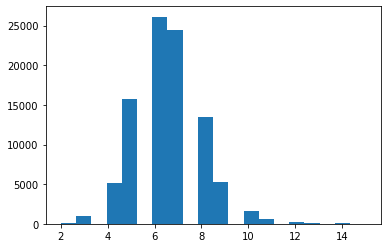

In [ ]:
plt.hist(names_len, bins= 20)
plt.show()

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
X = pad_sequences(X, maxlen=10, padding='pre')

In [ ]:
X.shape

(93889, 10)

In [ ]:
X[:5]

array([[ 0,  0,  0,  0,  0,  1,  1,  2,  1, 14],
       [ 0,  0,  0,  0,  0,  1,  1,  2,  8,  1],
       [ 0,  0,  0,  0,  0,  1,  1,  2,  9,  4],
       [ 0,  1,  1,  2, 18,  9,  5, 12, 12,  1],
       [ 0,  0,  0,  0,  0,  1,  1,  4,  1, 13]], dtype=int32)

In [ ]:
from keras.layers import SimpleRNN, Input, Embedding, Dense
from keras.models import Model

In [ ]:
vocab_size = len(vocab) + 1
vocab_size

27

In [ ]:
inp = Input(shape=(10, ))
emb = Embedding(input_dim=vocab_size, output_dim=5)(inp)
rnn = SimpleRNN(units=32, return_sequences=True)(emb)
rnn2 = SimpleRNN(units=64)(rnn)
out = Dense(units = 1, activation='sigmoid')(rnn2)

In [ ]:
model = Model(inputs = inp, outputs= out)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 10, 5)             135       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 10, 32)            1216      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                6208      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 7,624
Trainable params: 7,624
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics = ['acc'] )

In [ ]:
his = model.fit(X, y, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10
294/294 [==============================] - 6s 14ms/step - loss: 0.5328 - acc: 0.7316 - val_loss: 0.3910 - val_acc: 0.8262
Epoch 2/10
294/294 [==============================] - 4s 13ms/step - loss: 0.3975 - acc: 0.8153 - val_loss: 0.3861 - val_acc: 0.8233
Epoch 3/10
294/294 [==============================] - 4s 14ms/step - loss: 0.3932 - acc: 0.8173 - val_loss: 0.3816 - val_acc: 0.8299
Epoch 4/10
294/294 [==============================] - 4s 15ms/step - loss: 0.3830 - acc: 0.8230 - val_loss: 0.3775 - val_acc: 0.8309
Epoch 5/10
294/294 [==============================] - 4s 15ms/step - loss: 0.3852 - acc: 0.8202 - val_loss: 0.3832 - val_acc: 0.8245
Epoch 6/10
294/294 [==============================] - 4s 13ms/step - loss: 0.3787 - acc: 0.8246 - val_loss: 0.3755 - val_acc: 0.8282
Epoch 7/10
294/294 [==============================] - 4s 14ms/step - loss: 0.3771 - acc: 0.8255 - val_loss: 0.3778 - val_acc: 0.8259
Epoch 8/10
294/294 [==============================] - 4s 13ms/step - 

In [ ]:
test_name = "santosh".lower()

In [ ]:
seq = [vocab[i] for i in test_name]

In [ ]:
x_test = pad_sequences([seq], maxlen=10)
x_test

array([[ 0,  0,  0, 19,  1, 14, 20, 15, 19,  8]], dtype=int32)

In [ ]:
model.predict(x_test)

array([[0.54937065]], dtype=float32)